Dataset shape: (100, 2)
  label                                            message
0   ham  Funny fact Nobody teaches volcanoes 2 erupt, t...
1   ham  I sent my scores to sophas and i had to do sec...
2  spam  We know someone who you know that fancies you....
3   ham  Only if you promise your getting out as SOON a...
4  spam  Congratulations ur awarded either å£500 of CD ...
Missing values:
 label      0
message    0
dtype: int64


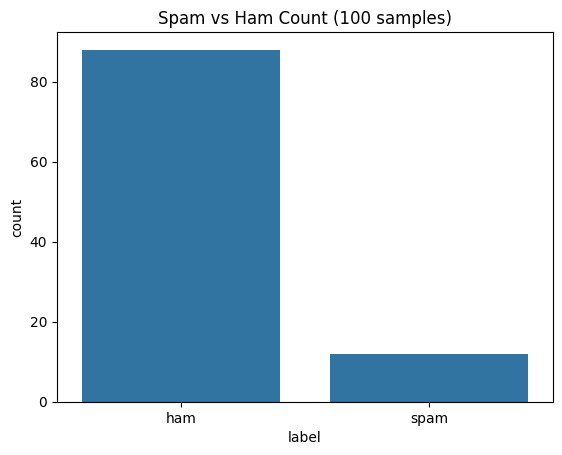

Accuracy: 0.85

Confusion Matrix:
 [[17  0]
 [ 3  0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92        17
           1       0.00      0.00      0.00         3

    accuracy                           0.85        20
   macro avg       0.42      0.50      0.46        20
weighted avg       0.72      0.85      0.78        20



[nltk_data] Downloading package stopwords to C:\Users\HP
[nltk_data]     CAMO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Load dataset (100 samples)
df = pd.read_csv("C:/Users/HP CAMO/Downloads/pert2/spam_100.csv")

# View dimensions of dataset
print("Dataset shape:", df.shape)

# Preview the dataset
print(df.head())

# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Visualize class distribution
sns.countplot(data=df, x='label')
plt.title('Spam vs Ham Count (100 samples)')
plt.show()

# Encode labels: ham = 0, spam = 1
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])

# Text preprocessing
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = text.split()
    text = [stemmer.stem(word) for word in text if word not in stop_words]
    return ' '.join(text)

df['cleaned_message'] = df['message'].apply(preprocess_text)

# Feature extraction using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df['cleaned_message']).toarray()
y = df['label']

# Split data into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train logistic regression classifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
